In [21]:
from functools import total_ordering
import calendar
import zipfile
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('AAPL.csv', sep=",")

In [23]:
print(df.head())

     UnderlyingSymbol  UnderlyingPrice Exchange  Type  Expiration    DataDate  \
1782             AAPL           111.47        *  call  11/04/2016  11/01/2016   
1783             AAPL           111.47        *   put  11/04/2016  11/01/2016   
1784             AAPL           111.47        *  call  11/04/2016  11/01/2016   
1785             AAPL           111.47        *   put  11/04/2016  11/01/2016   
1786             AAPL           111.47        *  call  11/04/2016  11/01/2016   

      Strike  Last   Bid    Ask  Volume  OpenInterest      IV  Delta  Gamma  \
1782    70.0  41.3  41.3  41.70       4             0  0.1945    1.0    0.0   
1783    70.0   0.0   0.0   0.01       0             0  0.4405    0.0    0.0   
1784    75.0  36.3  36.3  36.70       4             0  0.1945    1.0    0.0   
1785    75.0   0.0   0.0   0.01       0             0  0.4405    0.0    0.0   
1786    80.0  31.3  31.3  31.70      15            13  0.1945    1.0    0.0   

       Theta  Vega  
1782 -0.6359   0.

In [24]:
df2 = df.drop_duplicates(subset='DataDate', keep='first').filter(['DataDate', 'UnderlyingPrice'])

In [25]:
df2 = df2.set_index('DataDate')

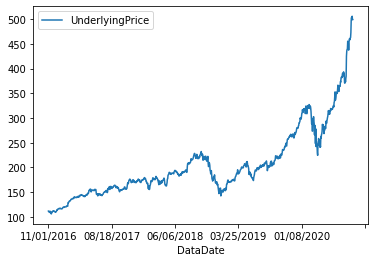

In [26]:
df2.plot()
plt.show()